# **Propuesta  (usando genes binarios)**

Ingrese la longitud del gen: 10
Ingrese el tamaño de la población: 100
Ingrese la probabilidad de mutación: 0.005
Ingrese la cantidad de generaciones: 100
Ingrese el valor minimo para el rango de busqueda: (float entre 0 y 2) 0.1
Ingrese el valor maximo para el rango de busqueda: (float entre 0 y 2) 1.9


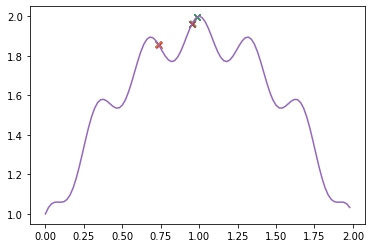

In [ ]:
# Importo las bibliotecas necesarias
import matplotlib.pyplot as plt
import numpy as np
import math

#se define la funcion problema 
def fx(x):    #O(1)
    return -(0.1+(1-x)**2-0.1*math.cos(6*math.pi*(1-x)))+2

#convierte las listas de genes binarios a un flotante que se reflejará como individuo en la grafica
  #Entradas: binary - list  de elementos binarios.
def binary2decimal(binary):     #O(binary) - O(n)
  number = 0  
  for b in binary:
    number = (2 * number) + b
  return number # float dentro del rango (0-2)

#define la forma como se emplea la mutacion 
#Entradas: lista de individuos (poblacion), probabilidad de mutacion, lista de configuracion de genes posibles (genetic_pool)
def mutate(individuals, prob, pool):      #O(individuals*(mutate_individual*prob)) - O(n^2)
    for i in range(len(individuals)):       #O(individuals*(mutate_individual*prob)) - O(n^2)
        mutate_individual=individuals[i]
        if np.random.random() < prob:
            mutation = np.random.choice(pool[0])
            mutate_individual = [mutation] + mutate_individual[1:]
        
        for j in range(1,len(mutate_individual)):   #O(mutate_individual*prob) - O(n)
            if np.random.random() < prob:
                mutation = np.random.choice(pool[1])
                mutate_individual = mutate_individual[0:j] + [mutation] + mutate_individual[j+1:] # +1 permite omitir el gen antiguo por el mutado
        individuals[i] = mutate_individual

#define el rango en el cual los individuos pueden reproducirse 
#aquellos individuos dentro de este rango (floats entre 0 y 2) se eliminarán de la poblacion 
#Entradas: min-float entre 0 y 2, max-float entre 0 y 2, poblacion - lista de individuos
def rangoBusqueda(min,max,poblacion):   #O(n)
    for individuo in poblacion:
        x = binary2decimal(individuo)/(2**longitud_gen/2)
        if (x < min) or (x > max):
            poblacion.remove(individuo)
    return poblacion

def errorPromedio(valorMaxFunc,poblacion):
    sumatoria = 0 
    for individuo in poblacion:
        x = binary2decimal(individuo)/(2**longitud_gen/2)
        y = fx(x)
        
        sumatoria = sumatoria + abs(valorMaxFunc - y)
    error = sumatoria/len(poblacion)
    return error
# def mejorIndividuo(poblacion):
#   return poblacion[np.where(fitness == fitness.max())[0][0]]

def mejorIndividuo(poblacion):
    imagenY = 0  
    mejorIndividuo = list()
    for individuo in poblacion:
        x = binary2decimal(individuo)/(2**longitud_gen/2)
        y = fx(x) 
        #el que tenga mayor f(x) es el mejor de cada gen :s
        if imagenY < y:
            imagenY = y
            mejorIndividuo = individuo
    
    return mejorIndividuo, imagenY


    



poblacion = []
genetic_pool = [[0,1],[0,1]]
longitud_gen = int(input("Ingrese la longitud del gen: "))
ind_size = longitud_gen
tamano_poblacion = int(input("Ingrese el tamaño de la población: "))
p_mutacion = float(input("Ingrese la probabilidad de mutación: "))
cantidad_generaciones = int(input("Ingrese la cantidad de generaciones: "))
rango_busquedaMin = float(input("Ingrese el valor minimo para el rango de busqueda: (float entre 0 y 2) "))
rango_busquedaMax = float(input("Ingrese el valor maximo para el rango de busqueda: (float entre 0 y 2) "))

y_axis = []
# x_axis=np.arange(0,rango_busqueda,0.02)
x_axis=np.arange(0,2,0.02)

for num in x_axis:
    y_axis.append(fx(num))

for i in range(tamano_poblacion):
    individuo = list(np.random.choice(genetic_pool[0],longitud_gen))
    poblacion.append(individuo)


errorGeneracional = []
mejores_individuos = []
mejores_individuosGen = []
for _ in range(cantidad_generaciones):
    
    fitness =[]

    # Extraigo los valores de y para medir su éxito
    for individuo in poblacion:
        x = binary2decimal(individuo)/(2**longitud_gen/2)
        y = fx(x)
        fitness += [y]

    # Convierto fitness en un vector para realizar operaciones más fácilmente
    fitness = np.array(fitness)

    # Divido todos los valores de y para la suma total y así obtener valores entre 0 y 1
    fitness=fitness/fitness.sum()    

    # Se reproducen los mejores individuos
    offspring = []
    
    size_poblacion = len(poblacion)
    for i in range(size_poblacion//2):
        parents = np.random.choice(size_poblacion, 2, p=fitness)
        cross_point = np.random.randint(ind_size)
        offspring += [poblacion[parents[0]][:cross_point] + poblacion[parents[1]][cross_point:]]
        offspring += [poblacion[parents[1]][:cross_point] + poblacion[parents[0]][cross_point:]]    

    poblacion = offspring
    
    poblacion = rangoBusqueda(rango_busquedaMin,rango_busquedaMax,poblacion)
    
    # Mutacion
    mutate(poblacion,p_mutacion,genetic_pool)

    error = errorPromedio(2.0,poblacion)
    errorGeneracional.append(error)
    mejor_individuo = mejorIndividuo(poblacion)
    mejores_individuos.append(mejor_individuo[1])
    mejores_individuosGen.append(mejor_individuo[0])

# print(len(mejores_individuos))


# Display
for individuo in poblacion:
  x = binary2decimal(individuo)/(2**longitud_gen/2)
  y = fx(x)
  plt.plot(x,y,'x')
plt.plot(x_axis,y_axis)


**Error poblacional vs Generacion**

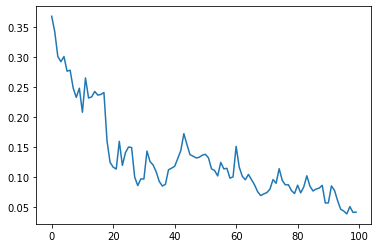

In [ ]:
generacionesArray = list(np.arange(0,cantidad_generaciones,1))
plt.plot(generacionesArray,errorGeneracional )

**Mejores individuos VS generación**

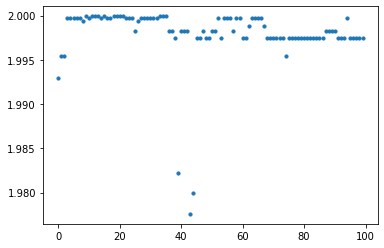

In [ ]:
generacionesArray = list(np.arange(0,cantidad_generaciones,1))
# print(len(generacionesArray))
# print(mejores_individuos)
# plot
fig, ax = plt.subplots()
ax.scatter(generacionesArray, mejores_individuos, s=10 )
# plt.plot(generacionesArray,mejores_individuos,'o')
plt.show()

# **Ejecución del codigo con otro tipo de funciones:**

**Funcion oscilante** (e^-x * sin(2 π x)) +1

Ingrese la longitud del gen: 10
Ingrese el tamaño de la población: 100
Ingrese la probabilidad de mutación: 0.005
Ingrese la cantidad de generaciones: 100
Ingrese el valor minimo para el rango de busqueda: (float entre 0 y 2) 0.1
Ingrese el valor maximo para el rango de busqueda: (float entre 0 y 2) 1.9
100


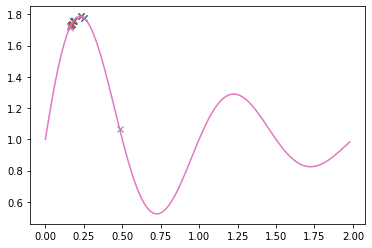

In [ ]:
# Importo las bibliotecas necesarias
import matplotlib.pyplot as plt
import numpy as np
import math

#se define la funcion problema 
def fx(x):    #O(1)
    # return -(aunq.1+(1-x)**2-0.1*math.cos(6*math.pi*(1-x)))+2
    return (math.exp(-x))*math.sin(2*math.pi*x)+1

#convierte las listas de genes binarios a un flotante que se reflejará como individuo en la grafica
  #Entradas: binary - list  de elementos binarios.
def binary2decimal(binary):     #O(binary) - O(n)
  number = 0  
  for b in binary:
    number = (2 * number) + b
  return number # float dentro del rango (0-2)

#define la forma como se emplea la mutacion 
#Entradas: lista de individuos (poblacion), probabilidad de mutacion, lista de configuracion de genes posibles (genetic_pool)
def mutate(individuals, prob, pool):      #O(individuals*(mutate_individual*prob)) - O(n^2)
    for i in range(len(individuals)):       #O(individuals*(mutate_individual*prob)) - O(n^2)
        mutate_individual=individuals[i]
        if np.random.random() < prob:
            mutation = np.random.choice(pool[0])
            mutate_individual = [mutation] + mutate_individual[1:]
        
        for j in range(1,len(mutate_individual)):   #O(mutate_individual*prob) - O(n)
            if np.random.random() < prob:
                mutation = np.random.choice(pool[1])
                mutate_individual = mutate_individual[0:j] + [mutation] + mutate_individual[j+1:] # +1 permite omitir el gen antiguo por el mutado
        individuals[i] = mutate_individual

#define el rango en el cual los individuos pueden reproducirse 
#aquellos individuos dentro de este rango (floats entre 0 y 2) se eliminarán de la poblacion 
#Entradas: min-float entre 0 y 2, max-float entre 0 y 2, poblacion - lista de individuos
def rangoBusqueda(min,max,poblacion):   #O(n)
    for individuo in poblacion:
        x = binary2decimal(individuo)/(2**longitud_gen/2)
        if (x < min) or (x > max):
            poblacion.remove(individuo)
    return poblacion

#define el error estimado de la población al intentar acercarse al maximo de la funcion 
#Entradas: valorMaxFunc - float (valor maximo de la funcion en f(x))  poblacion - lista de la poblacion
def errorPromedio(valorMaxFunc,poblacion):
    sumatoria = 0 
    for individuo in poblacion:
        x = binary2decimal(individuo)/(2**longitud_gen/2)
        y = fx(x)
        
        sumatoria = sumatoria + abs(valorMaxFunc - y)
    error = sumatoria/len(poblacion)
    return error
# def mejorIndividuo(poblacion):
#   return poblacion[np.where(fitness == fitness.max())[0][0]]

def mejorIndividuo(poblacion):
    imagenY = 0  
    mejorIndividuo = list()
    for individuo in poblacion:
        x = binary2decimal(individuo)/(2**longitud_gen/2)
        y = fx(x) 
        #el que tenga mayor f(x) es el mejor de cada gen :s
        if imagenY < y:
            imagenY = y
            mejorIndividuo = individuo
    
    return mejorIndividuo, imagenY


    



poblacion = []
genetic_pool = [[0,1],[0,1]]
longitud_gen = int(input("Ingrese la longitud del gen: "))
ind_size = longitud_gen
tamano_poblacion = int(input("Ingrese el tamaño de la población: "))
p_mutacion = float(input("Ingrese la probabilidad de mutación: "))
cantidad_generaciones = int(input("Ingrese la cantidad de generaciones: "))
rango_busquedaMin = float(input("Ingrese el valor minimo para el rango de busqueda: (float entre 0 y 2) "))
rango_busquedaMax = float(input("Ingrese el valor maximo para el rango de busqueda: (float entre 0 y 2) "))

y_axis = []
# x_axis=np.arange(0,rango_busqueda,0.02)
x_axis=np.arange(0,2,0.02)

for num in x_axis:
    y_axis.append(fx(num))

for i in range(tamano_poblacion):
    individuo = list(np.random.choice(genetic_pool[0],longitud_gen))
    poblacion.append(individuo)


errorGeneracional = []
mejores_individuos = []
mejores_individuosGen = []
for _ in range(cantidad_generaciones):
    
    fitness =[]

    # Extraigo los valores de y para medir su éxito
    for individuo in poblacion:
        x = binary2decimal(individuo)/(2**longitud_gen/2)
        y = fx(x)
        fitness += [y]

    # Convierto fitness en un vector para realizar operaciones más fácilmente
    fitness = np.array(fitness)

    # Divido todos los valores de y para la suma total y así obtener valores entre 0 y 1
    fitness=fitness/fitness.sum()    

    # Se reproducen los mejores individuos
    offspring = []
    
    size_poblacion = len(poblacion)
    for i in range(size_poblacion//2):
        parents = np.random.choice(size_poblacion, 2, p=fitness)
        cross_point = np.random.randint(ind_size)
        offspring += [poblacion[parents[0]][:cross_point] + poblacion[parents[1]][cross_point:]]
        offspring += [poblacion[parents[1]][:cross_point] + poblacion[parents[0]][cross_point:]]    

    poblacion = offspring
    
    poblacion = rangoBusqueda(rango_busquedaMin,rango_busquedaMax,poblacion)
    
    # Mutacion
    mutate(poblacion,p_mutacion,genetic_pool)

    error = errorPromedio(1.78886,poblacion)
    errorGeneracional.append(error)
    mejor_individuo = mejorIndividuo(poblacion)
    mejores_individuos.append(mejor_individuo[1])
    mejores_individuosGen.append(mejor_individuo[0])
    
print(len(mejores_individuos))


# Display
for individuo in poblacion:
  x = binary2decimal(individuo)/(2**longitud_gen/2)
  y = fx(x)
  plt.plot(x,y,'x')
plt.plot(x_axis,y_axis)


**Error poblacional vs Generacion**

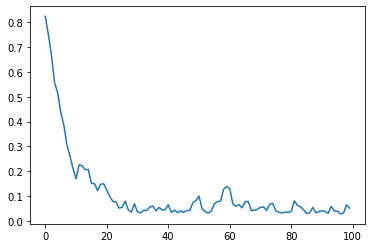

In [ ]:
generacionesArray = list(np.arange(0,cantidad_generaciones,1))
plt.plot(generacionesArray,errorGeneracional )

**Mejores individuos VS generación**

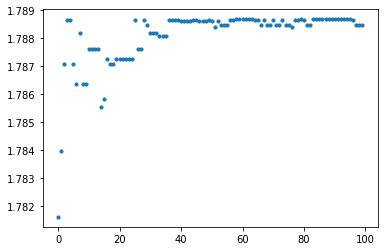

In [ ]:
generacionesArray = list(np.arange(0,cantidad_generaciones,1))
# print(len(generacionesArray))
# print(mejores_individuos)
# plot
fig, ax = plt.subplots()
ax.scatter(generacionesArray, mejores_individuos, s=10 )
# plt.plot(generacionesArray,mejores_individuos,'o')
plt.show()

In [ ]:
np.where(fitness == fitness.max())

(array([ 0, 10, 21, 43]),)

In [ ]:
binary2decimal(poblacion[np.where(fitness == fitness.max())[0][0]])

93

In [ ]:
print(poblacion[0])

[0, 0, 0, 1, 0, 1, 1, 1, 0, 1]


**Funcion lineal** ((1/2)*x+1)

Ingrese la longitud del gen: 10
Ingrese el tamaño de la población: 100
Ingrese la probabilidad de mutación: 0.005
Ingrese la cantidad de generaciones: 100
Ingrese el valor minimo para el rango de busqueda: (float entre 0 y 2) 0.1
Ingrese el valor maximo para el rango de busqueda: (float entre 0 y 2) 1.9


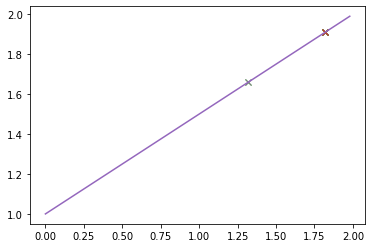

In [ ]:
# Importo las bibliotecas necesarias
import matplotlib.pyplot as plt
import numpy as np
import math

#se define la funcion problema 
def fx(x):    #O(1)
    return ((1/2) *x)+1

#convierte las listas de genes binarios a un flotante que se reflejará como individuo en la grafica
  #Entradas: binary - list  de elementos binarios.
def binary2decimal(binary):     #O(binary) - O(n)
  number = 0  
  for b in binary:
    number = (2 * number) + b
  return number # float dentro del rango (0-2)

#define la forma como se emplea la mutacion 
#Entradas: lista de individuos (poblacion), probabilidad de mutacion, lista de configuracion de genes posibles (genetic_pool)
def mutate(individuals, prob, pool):      #O(individuals*(mutate_individual*prob)) - O(n^2)
    for i in range(len(individuals)):       #O(individuals*(mutate_individual*prob)) - O(n^2)
        mutate_individual=individuals[i]
        if np.random.random() < prob:
            mutation = np.random.choice(pool[0])
            mutate_individual = [mutation] + mutate_individual[1:]
        
        for j in range(1,len(mutate_individual)):   #O(mutate_individual*prob) - O(n)
            if np.random.random() < prob:
                mutation = np.random.choice(pool[1])
                mutate_individual = mutate_individual[0:j] + [mutation] + mutate_individual[j+1:] # +1 permite omitir el gen antiguo por el mutado
        individuals[i] = mutate_individual

#define el rango en el cual los individuos pueden reproducirse 
#aquellos individuos dentro de este rango (floats entre 0 y 2) se eliminarán de la poblacion 
#Entradas: min-float entre 0 y 2, max-float entre 0 y 2, poblacion - lista de individuos
def rangoBusqueda(min,max,poblacion):   #O(n)
    for individuo in poblacion:
        x = binary2decimal(individuo)/(2**longitud_gen/2)
        if (x < min) or (x > max):
            poblacion.remove(individuo)
    return poblacion

def errorPromedio(valorMaxFunc,poblacion):
    sumatoria = 0 
    for individuo in poblacion:
        x = binary2decimal(individuo)/(2**longitud_gen/2)
        y = fx(x)
        
        sumatoria = sumatoria + abs(valorMaxFunc - y)
    error = sumatoria/len(poblacion)
    return error



def mejorIndividuo(poblacion):
    imagenY = 0  
    mejorIndividuo = list()
    for individuo in poblacion:
        x = binary2decimal(individuo)/(2**longitud_gen/2)
        y = fx(x) 
        #el que tenga mayor f(x) es el mejor de cada gen :s
        if imagenY < y:
            imagenY = y
            mejorIndividuo = individuo
    
    return mejorIndividuo, imagenY



poblacion = []
genetic_pool = [[0,1],[0,1]]
longitud_gen = int(input("Ingrese la longitud del gen: "))
ind_size = longitud_gen
tamano_poblacion = int(input("Ingrese el tamaño de la población: "))
p_mutacion = float(input("Ingrese la probabilidad de mutación: "))
cantidad_generaciones = int(input("Ingrese la cantidad de generaciones: "))
rango_busquedaMin = float(input("Ingrese el valor minimo para el rango de busqueda: (float entre 0 y 2) "))
rango_busquedaMax = float(input("Ingrese el valor maximo para el rango de busqueda: (float entre 0 y 2) "))

y_axis = []
# x_axis=np.arange(0,rango_busqueda,0.02)
x_axis=np.arange(0,2,0.02)

for num in x_axis:
    y_axis.append(fx(num))

for i in range(tamano_poblacion):
    individuo = list(np.random.choice(genetic_pool[0],longitud_gen))
    poblacion.append(individuo)


errorGeneracional = []
mejores_individuos = []
mejores_individuosGen = []
for _ in range(cantidad_generaciones):
    
    fitness =[]

    # Extraigo los valores de y para medir su éxito
    for individuo in poblacion:
        x = binary2decimal(individuo)/(2**longitud_gen/2)
        y = fx(x)
        fitness += [y]

    # Convierto fitness en un vector para realizar operaciones más fácilmente
    fitness = np.array(fitness)

    # Divido todos los valores de y para la suma total y así obtener valores entre 0 y 1
    fitness=fitness/fitness.sum()    

    # Se reproducen los mejores individuos
    offspring = []
    
    size_poblacion = len(poblacion)
    for i in range(size_poblacion//2):
        parents = np.random.choice(size_poblacion, 2, p=fitness)
        cross_point = np.random.randint(ind_size)
        offspring += [poblacion[parents[0]][:cross_point] + poblacion[parents[1]][cross_point:]]
        offspring += [poblacion[parents[1]][:cross_point] + poblacion[parents[0]][cross_point:]]    

    poblacion = offspring
    
    poblacion = rangoBusqueda(rango_busquedaMin,rango_busquedaMax,poblacion)
    
    # Mutacion
    mutate(poblacion,p_mutacion,genetic_pool)

    error = errorPromedio(2,poblacion)
    errorGeneracional.append(error)
    mejor_individuo = mejorIndividuo(poblacion)
    mejores_individuos.append(mejor_individuo[1]) #almacenamiento de valores de cada uno de los mejores individuos 
    mejores_individuosGen.append(mejor_individuo[0]) #
    


# Display
for individuo in poblacion:
  x = binary2decimal(individuo)/(2**longitud_gen/2)
  y = fx(x)
  plt.plot(x,y,'x')
plt.plot(x_axis,y_axis)


**Error poblacional vs Generacion**

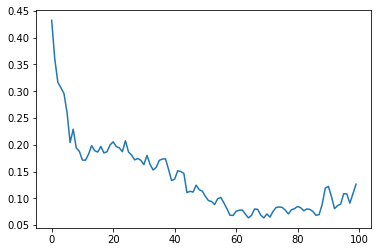

In [ ]:
generacionesArray = list(np.arange(0,cantidad_generaciones,1))
plt.plot(generacionesArray,errorGeneracional )

**Mejores individuos VS generación**

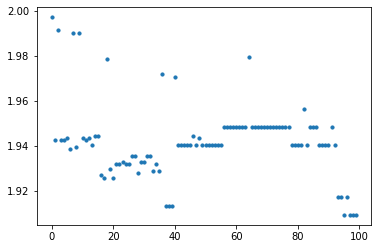

In [ ]:
generacionesArray = list(np.arange(0,cantidad_generaciones,1))
# print(len(generacionesArray))
# print(mejores_individuos)
# plot
fig, ax = plt.subplots()
ax.scatter(generacionesArray, mejores_individuos, s=10 )
# plt.plot(generacionesArray,mejores_individuos,'o')
plt.show()

In [ ]:
np.where(fitness == fitness.max())

(array([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13]),)

In [ ]:
binary2decimal(poblacion[np.where(fitness == fitness.max())[0][0]])

931

In [ ]:
print(poblacion[0])

[1, 1, 1, 0, 1, 0, 0, 0, 1, 1]


In [ ]:
fitness[0]

0.07210297263406358

# **Analisis finales** 

**punto 5** 

*Sobre el uso de diferentes funciones:*


*   Oscilantes:
    
    Para este caso se puede ver que existe para la generación 100 un grupo de segregación en uno de los picos más cercanos al máximo global. Pero la mayoría de individuos para este momento ya están practicamente sobre el 2.
    
    Para la gráfica que muestra el error generacional se puede ver que decrece rapidamente, pero en un punto entre la generación 10 y la 20 tiene un pequeño llano y luego baja subitamente para luego decrecer hasta el punto que vemos en el cual es prácticamente nulo el error.

    Para finalizar, vemos que el mejor individuo de cada generación resulta siempre en aquel que tiene el valor más cercano al máximo y existen 3 puntos que no siguen esta norma. Esto debido probablemente a la mutación, ya que puede pasar que los individuos más bajos tuvieran un "Golpe de suerte" y lograran reproducirse, pero se ve como la segregación natural elimino rapidamente este fenómeno.
*   Lineales:

    En el caso de los lineales se ve que la segregación se concentró en dos puntos especificos. Ya que practicamente no existen individuos perceptibles fuera de los dos puntos visibles. Debido al rango de búsqueda, se puede ver que se establecieron los individuos cercanos al 1.9 pero jamás llegan a acercarse demasiado, pues esto signifcaria en sus genes la tendencia a crecer y moririan por salir del rango.

    La gráfica de error muestra un descenso abismal desde las primeras generaciones y luego se baja el ritmo de decrecimiento pero nunca para. Esto puede suceder debido a que ya que no existen multiples máximos, el genoma no tiene tanta variabilidad para comprender cuando está cerca del máximo.

    Lo que más sorprende es ver esa dispersión tan grande que ocurre en los mejores individuos, pues parece que, como se mencionó anteriormente, los individuos empezaron a segregarse a un punto en el que no crecieran lo suficiente como para salir del rango de búsqueda y por lo tanto, en vez de acercarse aun más al máximo que es el 2, tienden al 1.8, punto en el cual vimos que estaban segregados los individuos en la gráfica inicial de los lineales.
*   Otros:

    En esta sección dejamos el oscilante variado, pues este empieza a decrecer, por lo tanto sus máximos locales son cada vez menores y la función empieza a tender a 1,por lo que la segregación sucede en su primer pico. Podemos ver que para la generación 100 aún existe un "llanero solitario" que vaga por el decrecimiento del máximo global, pero este se va a terminar eliminando y segregando junto con los demás individuos.

    El error de esta función es muy similar al caso de los lineales, puesto que al haver un máximo tan claro, no tiene problemas de segregación tan marcados como con la oscilante "común". Se puede ver el decrecimiento fuerte al inicio y un menor decrecimiento a lo largo de las generaciones.

    Como último, se puede ver que los mejores individuos si son muy similares a lo visto en los osciladores comunes, por lo que podriamos decir que esta función actúa como un híbrido entre ambos tipos.




**Punto 6**

Para este punto podemos hablar que para el caso del *espacio*, lo que más afecta **es el largo del individuo y la población de los mismos**, debido a que para nuestro algoritmo la generación contiene un número determinado de individuos que una vez que se realiza el fitness vuelven a poblar por medio de la reproducción. Y debido a esto, la cantidad de individuos se mantiene siempre constante, pero se generen y borren constantemente durante la simulacion.

En el caso de la longitud de cada individuo, como se menciono anteriormente, estos van a poblar con un determinado número todas las generaciones y entre más largo sea cada individuo, más información debe contener cada generación y es mayor la cantidad de información que debe leer, producir y recibir durante la simulación.

La cantidad de generaciones es otro punto que afecta a la memoria principalmente, pues para realizar el almacenamiento se necesita memoria y si esta recibe la información de demasiadas generaciones puede colapsar. Aunque para alcanzar este punto serían necesarias demasiadas iteraciones de generaciones para lograr acaparar todo el espacio disponible.

Lo que si puede verse bastante afectado debido a la **cantidad de generaciones** es el *tiempo de ejecución*, puesto que debido a que cada generación se puede tomar como una iteración, a mayor cantidad de estas corresponde un mayor tiempo en la ejecución completa.

De nuevo, podemos tomar los pequeños pasos dentro de cada iteración como lo sería la lectura de la población individuo por individuo o la segregación que se realiza con estos que corresponde a más ciclos, para notar que la longitud y cantidad de individuos también afecta al tiempo de ejecución pero como una consecuencia de la contante iteracion de las generaciones asignadas.






**Punto 7**

*¿Qué parametro es el más importante para acelerar la convergencia de la busqueda?*

Luego de ejecutar varias pruebas, nos dimos cuenta de que existen dos parametros que nos pueden llevar a una convergencia más exacta, sin embargo uno de ellos nos permite acelerar este proceso. Hablo de la cantidad de generaciones y la cantidad de genes.


En el caso de la cantidad de generaciones, al iterar e iterar lo que nos va a permitir este proceso es la continuación de la reproducción la cual está parametrizada para tomar los individuos cuya imagen es más grande (f(x)) como los más aptos para reproducirse. Sin embargo este proceso es un proceso cuya efectividad es directamente proporcional al número de ejecuciones, es decir, requiere más tiempo de ejecución para llevarnos a una mejor respuesta. 

Por otro lado, la cantidad de genomas es un parametro que a pesar de que al aumentarse tiene un costo en memoria, luego de varias pruebas se demostró que el aumentar este parametro aumenta la eficiencia del algoritmo. Ello demuestra que el hecho de tener individuos con mayores genes se aumenta la probabilidad de que estos puedan adaptarse mejor y más rapidamente.  


